# Project: Wrangling and Analyze Data

# Table of Contents
1. [Data Gathering](#data_gathering)
2. [Assessing Data](#Assessing_Data)
3. [Cleaning Data](#Cleaning_Data)
4. [Analyzing and Visualizing Data](#Analyzing_and_Visualizing_Data)

In [1]:
# Imports
import pandas as pd
import numpy as np
import requests
import tweepy
import json

## Data Gathering

<a id="data_gathering"> </a>

In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Send an HTTP request to the URL
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Read tsv file
df_image_predictions = pd.read_csv(url, sep='\t')
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# # API key
# consumer_key = 'consumer_key'
# consumer_secret = 'consumer_secret'
# access_token = 'access_token'
# access_secret = 'access_secret'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)
# api = tweepy.API(auth)

# id_of_tweet = df_twitter_archive['tweet_id'][0]
# tweet = api.get_status(id_of_tweet)
# print(tweet.text)

In [5]:
# Read tweet-json.txt
with open('tweet-json.txt', 'r') as file:
    json_data = file.read()

# Convert to pandas df
df_tweet_json = pd.read_json(json_data, lines=True)

df_tweet_json.head(50)


,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,NaN,NaN,2017-07-29 00:08:17,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891087942176911360, 'id_str'...",20562,False,Here we have a majestic great white breaching ...,NaN,...,0.0,NaN,NaN,NaN,3261,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,NaN,NaN,2017-07-28 16:27:12,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890971906207338496, 'id_str'...",12041,False,Meet Jax. He enjoys ice cream so much he gets ...,NaN,...,0.0,NaN,NaN,NaN,2158,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,NaN,NaN,2017-07-28 00:22:40,"[0, 118]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890729118844600320, 'id_str'...",56848,False,When you watch your owner call another dog a g...,NaN,...,0.0,NaN,NaN,NaN,16716,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,NaN,NaN,2017-07-27 16:25:51,"[0, 122]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 890609177319665665, 'id_str'...",28226,False,This is Zoey. She doesn't want to be one of th...,NaN,...,0.0,NaN,NaN,NaN,4429,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,NaN,NaN,2017-07-26 15:59:51,"[0, 133]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 890240245463175168, 'id_str'...",32467,False,This is Cassie. She is a college pup. Studying...,NaN,...,0.0,NaN,NaN,NaN,7711,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Project note: Problems using Twitter API
The line `tweet = api.get_status(id_of_tweet)` returns the error:

TweepError: [{'message': 'You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve', 'code': 453}]

The script provided `twitter-api.py` also encounters the same error and returns fail on every tweet.

Therefore it seems this method is no longer feasible without applying for a higher level of access to the Twitter API. For the project we will use the data provided in the `twitter-archive-enhanced.csv` file instead.

## Assessing Data

<a id="Assessing_Data"> </a>
<a id="data_gathering"> </a>

In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
# Info for df_twitter_archive dataframe
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
# Info for df_image_predictions dataframe
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [8]:
# Info for df_twitter_archive_enhanced dataframe
df_tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [9]:
# Check for nan values
df_twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [10]:
# Check for nan values
df_image_predictions.isna().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [11]:
# Info for df_twitter_archive_enhanced dataframe
df_tweet_json.isna().sum()

contributors                     2354
coordinates                      2354
created_at                          0
display_text_range                  0
entities                            0
extended_entities                 281
favorite_count                      0
favorited                           0
full_text                           0
geo                              2354
id                                  0
id_str                              0
in_reply_to_screen_name          2276
in_reply_to_status_id            2276
in_reply_to_status_id_str        2276
in_reply_to_user_id              2276
in_reply_to_user_id_str          2276
is_quote_status                     0
lang                                0
place                            2353
possibly_sensitive                143
possibly_sensitive_appealable     143
quoted_status                    2326
quoted_status_id                 2325
quoted_status_id_str             2325
retweet_count                       0
retweeted   

In [12]:
# Check for duplicates
n_df_twitter_archive = df_twitter_archive.duplicated().sum()
n_df_image_predictions = df_image_predictions.duplicated().sum()
# n_df_tweet_json = df_tweet_json.duplicated().sum()

print(n_df_twitter_archive, n_df_image_predictions)


0 0


In [13]:
df_twitter_archive.dtypes


tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [14]:
df_image_predictions.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [15]:
df_tweet_json.dtypes

contributors                            float64
coordinates                             float64
created_at                       datetime64[ns]
display_text_range                       object
entities                                 object
extended_entities                        object
favorite_count                            int64
favorited                                  bool
full_text                                object
geo                                     float64
id                                        int64
id_str                                    int64
in_reply_to_screen_name                  object
in_reply_to_status_id                   float64
in_reply_to_status_id_str               float64
in_reply_to_user_id                     float64
in_reply_to_user_id_str                 float64
is_quote_status                            bool
lang                                     object
place                                    object
possibly_sensitive                      

### Quality issues

1. dog_categorization should be maximum one categorization by dog. If a single tweet has two categorizations filter it from the dataset.
2. Remove retweets. You only want original ratings (no retweets) that have images.
3. Replace all instances of 'None' with NaN.
4. Extract the hashtags in 'entities' to a separate column
5. There are some outliers in the rating_numerator and rating_denominator columns due to 'joke' ratings or data extraction errors. We can clean this data by removing rows with values that only appear a few number of times in the dataset.
6. Parameter 'display_text_range' contains the tweet length as a list of two integers. The first one is always 0 so we can extract the second number as the tweet length.
7. There are 9 parameters used to contain the information on the neural network dog classifications. We can collapse this into two parameters: 
8. Combined dataset has a lot of additional columns which are not necessary for the analysis. 

### Tidiness issues
1. df_twitter_archive: doggo, floofer, pupper, puppo: should be combined to a single categorical column 'dog_categorization'. Some rows have 'None' in all of these columns, some rows have multiple values in these columns, and most have one value.
2. Combine datasets to single dataframe. Merge datasets using the tweet_id and drop any rows which do not appear in all datasets.

## Cleaning Data

<a id="Cleaning_Data"> </a>


In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [16]:
df_twitter_archive_copy = df_twitter_archive.copy()
df_image_predictions_copy = df_image_predictions.copy()
df_tweet_json_copy = df_tweet_json.copy()

### Issue #1:

#### Define: 

Tidiness: df_twitter_archive: doggo, floofer, pupper, puppo: should be combined to a single categorical column 'dog_categorization'. Some rows have 'None' in all of these columns, some rows have multiple values in these columns, and most have one value.

#### Code

In [17]:
# Note: this method stacks  the 'doggo', 'floofer', 'pupper', 'puppo' columns. 
# Some rows have none-null values in multiple of these columns. 
# Each dog should have one stage so this data needs to be cleaned
# Instead of visual inspection, we drop these rows.

# TODO: drop rows where multiple columns filled
# TODO: instead replace 'None' in combined dataframe!

# Use the melt() function to reshape the DataFrame
melted_df = df_twitter_archive_copy.melt(id_vars=['tweet_id'], value_vars=['doggo', 'floofer', 'pupper', 'puppo'], var_name='dog_categorization', value_name='dog_value')

# Filter the melted DataFrame to keep only the rows where 'dog_value' is not 'None'
# NOTE: This approach is wrong. We want to keep the 'None' if all rows had 'None'
melted_df = melted_df[melted_df['dog_value'] != 'None']

# Drop the unnecessary 'dog_value' column
melted_df.drop(columns=['dog_value'], inplace=True)

# Merge the reshaped dog categorization column back into the original DataFrame
df_twitter_archive_copy = df_twitter_archive_copy.merge(melted_df, on='tweet_id', how='left')

# Drop the original dog category columns
df_twitter_archive_copy.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)


#### Test

In [18]:
# Check values of new column
df_twitter_archive_copy['dog_categorization'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

### Issue #2: 

#### Define: 
Quality: dog_categorization should be maximum one categorization by dog. If a single tweet has two categorizations filter it from the dataset.

#### Code

In [19]:
# Filter group if larger than 1
def filter_len(group):
    return len(group) == 1

# These rows can be found by duplicate tweet_id 
df_twitter_archive_copy = df_twitter_archive_copy.groupby('tweet_id').filter(filter_len)

#### Test

In [20]:
# Check number of duplicate rows
df_twitter_archive_copy['tweet_id'].duplicated().sum()

0

### Issue #3

#### Define: 

Tidiness: Combine datasets to single dataframe. Merge datasets using the tweet_id and drop any rows which do not appear in all datasets.

In [21]:
# Join datasets, ignoring any duplicate column names using regex
df_tweets = pd.merge(df_twitter_archive_copy, df_image_predictions_copy, on='tweet_id', how='inner', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
df_tweets = pd.merge(df_tweets, df_tweet_json_copy, left_on='tweet_id', right_on='id', how='inner', suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')


#### Test: 

In [22]:
# Check we have all columns from each dataset, this will be tidied up later
list(df_tweets)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'timestamp',
 'source',
 'text',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'dog_categorization',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'favorite_count',
 'favorited',
 'full_text',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'retweet_count',
 'retweeted',
 'retweeted_status',
 'truncated',
 'user']

### Issue #4

#### Define: 

Quality: Remove retweets. You only want original ratings (no retweets) that have images.

In [23]:
# Retweets have an id in the 'retweeted_status_id' parameter so we can remove them by dropping all non-nan values 
df_tweets = df_tweets[df_tweets['retweeted_status_id'].isna()]


#### Test: 

In [24]:
# Test no retweets
df_tweets['retweeted_status_id'].isna().sum() == df_tweets.shape[0]

# # Check no tweets without images - from img_num parameter it seems not
# df_tweets['img_num'].value_counts()

True

### Issue #5: 

#### Define: 

Quality: Replace all instances of 'None' with NaN.

In [25]:
# Replace all cells with the string 'None' with NaN
df_tweets = df_tweets.replace('None', np.nan)

#### Test: 

In [26]:
# We can see the values 'dog_categorization' have been replaced
# df_tweets['name'].isna().sum()
df_tweets.applymap(lambda x: x == 'None').sum().sum()

0

### Issue #6

#### Define:

Quality: Extract the hashtags in 'entities' to a separate column

In [27]:
# Extract hashtags and return as list
def extract_hashtags(entities):
    hashtag_list = [tag['text'] for tag in entities['hashtags']]
    return hashtag_list

# Apply function to 'entities'
df_tweets['hashtags'] = df_tweets['entities'].apply(extract_hashtags)


#### Test: 

In [28]:
# Check hashtag column
# df_tweets['hashtags'].apply(len).unique()
pd.Series(list(set([item for sublist in df_tweets['hashtags'] for item in sublist])))


0     dogsatpollingstations
1           PrideMonthPuppo
2                     swole
3               WomensMarch
4                PrideMonth
5             notallpuppers
6                 NoDaysOff
7                 Canada150
8                WKCDogShow
9             K9VeteransDay
10                 BarkWeek
11                 FinalFur
12             BellLetsTalk
dtype: object

### Issue #7

#### Define: 

Quality: There are some outliers in the rating_numerator and rating_denominator columns due to 'joke' ratings or data extraction errors. We can clean this data by removing rows with values that only appear a few number of times in the dataset.


In [29]:
# Many of the tweets have 'joke' ratings outside of the normal 1-10 range.
# For our analysis we should filter out these rows. 
# We can do this by removing rows with values that only appear a few number of times in the dataset

# Filter group if larger than 2
def filter_len(group):
    return len(group) > 2

# Groupby the 'rating_numerator' column and apply the filter
df_tweets = df_tweets.groupby('rating_numerator').filter(filter_len)

# Groupby the 'rating_denominator' column and apply the filter
df_tweets = df_tweets.groupby('rating_denominator').filter(filter_len)

#### Test: 

In [30]:
# We see that with the filtered data our 'rating_numerator' ranges from [0, 14] and 'rating_denominator' ranges from [10]
# Although the ratings above 10 are 'joke' ratings they are frequent enough that we can use them in analysis
# {"numerator_list": np.sort(df_tweets['rating_numerator'].unique()), "denominator_list": np.sort(df_tweets['rating_denominator'].unique())
# }

print("rating_numerator: \n", df_tweets['rating_numerator'].value_counts(), "\n")
print("rating_denominator: \n", df_tweets['rating_denominator'].value_counts())


rating_numerator: 
 12    445
10    418
11    394
13    259
9     150
8      95
7      51
14     35
6      32
5      32
3      19
4      15
2       9
1       4
Name: rating_numerator, dtype: int64 

rating_denominator: 
 10    1958
Name: rating_denominator, dtype: int64


### Issue #8

#### Define: 

Quality: Parameter 'display_text_range' contains the tweet length as a list of two integers. The first one is always 0 so we can extract the second number as the tweet length.

In [31]:
df_tweets['tweet_length'] = df_tweets['display_text_range'].apply(lambda x: x[1])

#### Test: 

In [32]:
df_tweets['tweet_length'].head()

0     85
1    138
2    121
3     79
4    138
Name: tweet_length, dtype: int64

### Issue #9

#### Define: 

Tidiness: There are 9 parameters used to contain the information on the neural network dog classifications. We can collapse this into two parameters:  

In [33]:
# Function to return top dog classification and the confidence 
def top_dog_classification(row):
    if row['p1_dog']:
        return row['p1'], row['p1_conf']
    elif row['p2_dog']:
        return row['p2'], row['p2_conf']
    elif row['p3_dog']:
        return row['p3'], row['p3_conf']
    else:
        return None, None
        
df_tweets['dog_classification'], df_tweets['conf'] = zip(*df_tweets.apply(top_dog_classification, axis=1))


#### Test: 

In [34]:
cols = ['dog_classification', 'conf', 'p1', 'p2', 'p3']
df_tweets[cols].head()

,dog_classification,conf,p1,p2,p3
0,None,None,orange,bagel,banana
1,Chihuahua,0.323581,Chihuahua,Pekinese,papillon
2,Chihuahua,0.716012,Chihuahua,malamute,kelpie
3,Labrador_retriever,0.168086,paper_towel,Labrador_retriever,spatula
4,basset,0.555712,basset,English_springer,German_short-haired_pointer


### Issue #10

#### Define: 

Quality: Combined dataset has a lot of additional columns which are not necessary for the analysis. 

In [35]:
# Get list of columns
# df_tweets.columns

# ['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
#        'source', 'text', 'expanded_urls', 'rating_numerator',
#        'rating_denominator', 'name', 'dog_categorization', 'jpg_url',
#        'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
#        'p3_conf', 'p3_dog', 'created_at', 'display_text_range', 'entities',
#        'extended_entities', 'favorite_count', 'favorited', 'full_text', 'id',
#        'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id_str',
#        'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'place',
#        'possibly_sensitive', 'possibly_sensitive_appealable', 'retweet_count',
#        'retweeted', 'truncated', 'user', 'tweet_length', 'hashtags']

# Select columns to use for data analysis

cols = ['tweet_id', 'timestamp', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_categorization', 'dog_classification', 'conf', 'jpg_url',
       'img_num', 'tweet_length', 'hashtags', 'favorite_count', 'retweet_count']

df_tweets = df_tweets[cols]

# Justifications:
# Parameters which are only false so can be dropped: is_quote_status, possibly_sensitive, possibly_sensitive_appealable, retweeted, truncated
# Duplicate / similar parameters (keep one): {tweet_id, id, id_str}, {text, full_text}, {entities, extended_entities}, {timestamp, created_at}
# Inaccurate parameters: are always/mostly false but actually true in all cases: retweeted, favorited
# Not useful data: display_text_range, source, place?, extended_entities, expanded_urls, lang(not enough data), place (all but one line NaN)
# entities: possible useful data in hashtags, symbols, user_mentions, 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3','p3_conf', 'p3_dog',


#### Test: 

In [36]:
# Number of columns
df_tweets.shape[1] == len(cols)

True

### Additional Issues

1. df_image_predictions: top prediction is sometimes not a dog. Simplify dataset by taking most likely answer that is a dog and the probability into two columns 'p' and 'p_conf'.

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [37]:
df_tweets.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

<a id="Analyzing_and_Visualizing_Data"> </a>

In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [38]:
df_tweets.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,dog_categorization,dog_classification,conf,jpg_url,img_num,tweet_length,hashtags,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,None,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,85,[],39467,8853
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,Chihuahua,0.323581,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,138,[],33819,6514
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,Chihuahua,0.716012,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,121,[],25461,4328
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,Labrador_retriever,0.168086,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,79,[],42908,8964
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,basset,0.555712,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,138,[BarkWeek],41048,9774


### Insights:
1. Relationship between dog categorisation and score

2. Relationship between hashtag and score

3. Most common names

In [39]:
# 1. Relationship between dog classification and score
df_group_class = df_tweets.groupby(['dog_classification']) \
    .agg({'rating_numerator': ['mean', 'count'], 'favorite_count': 'mean', 'retweet_count': 'mean'}) \
    .sort_values(('rating_numerator', 'mean'), ascending=False) \
    .reset_index()

# View most popular dog classifications
df_group_class = df_group_class[df_group_class[('rating_numerator', 'count')] > 30]



In [40]:
# 2. Relationship between dog categorisation and score
df_group_cat = df_tweets.groupby(['dog_categorization']) \
    .agg({'rating_numerator': ['mean', 'count'], 'favorite_count': 'mean', 'retweet_count': 'mean'}) \
    .sort_values(('rating_numerator', 'mean'), ascending=False) \
    .reset_index()

df_group_cat.head()

dog_categorization rating_numerator       favorite_count retweet_count
                                 mean count           mean          mean
0            floofer        12.000000     7   13206.000000   4968.714286
1              puppo        12.000000    22   21582.090909   6473.954545
2              doggo        11.888889    63   19356.380952   7125.698413
3             pupper        10.633663   202    7197.133663   2365.950495

In [41]:
# 3. Relationship between tweet length and score
df_group_len = df_tweets.groupby(['tweet_length']) \
    .agg({'rating_numerator': ['mean', 'count'], 'favorite_count': 'mean', 'retweet_count': 'mean'}) \
    .sort_values(('rating_numerator', 'mean'), ascending=False) \
    .reset_index()

df_group_len.head()

tweet_length rating_numerator       favorite_count retweet_count
                           mean count           mean          mean
0           58        13.000000     3    9286.000000   3535.333333
1           32        13.000000     1   12270.000000   4828.000000
2           41        12.500000     4    6676.000000   1548.250000
3           38        12.333333     3    6094.333333   2075.333333
4           47        12.333333     3   12850.333333   6293.000000

In [42]:
# 4. Most common names
df_group_names = df_tweets.groupby(['name'])['rating_numerator'] \
    .agg(['mean', 'count']) \
    .sort_values('count', ascending=False) \
    .reset_index()

# NOTE: remove 'a', 'the', 'an'
values_to_drop = ['a', 'the', 'an']
df_group_names = df_group_names[~df_group_names['name'].isin(values_to_drop)]

df_group_names[df_group_names['count'] > 5]


,name,mean,count
1,Charlie,11.636364,11
2,Lucy,11.400000,10
3,Cooper,11.300000,10
4,Oliver,11.300000,10
5,Tucker,12.000000,9
6,Penny,10.666667,9
7,Winston,10.500000,8
8,Sadie,10.250000,8
9,Toby,10.571429,7
11,Lola,10.857143,7


### Visualization

1. Score distribution

2. Dog classification

Other parameters include tweet length, favorite_count, retweet_count, conf

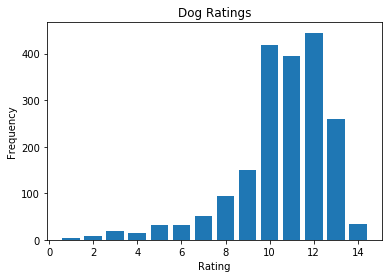

In [43]:
%matplotlib inline 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Create the figures folder if it doesn't exist
if not os.path.exists('figures'):
    os.makedirs('figures')

# Bar chart of rating_numerator - denominator not required as all are 10

# Count the occurrences of each unique value in the 'rating_numerator' column
rating_counts = df_tweets['rating_numerator'].value_counts()

# Sort the index (unique rating numerators) for better visualization
rating_counts = rating_counts.sort_index()

# Create the bar chart
plt.bar(rating_counts.index, rating_counts.values)

# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Dog Ratings')

# Save the plot as a PNG file
plt.savefig('figures/bar_ratings.png')

# Show the plot
plt.show()


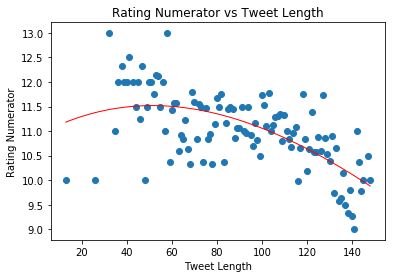

In [44]:
# Define x, y
x = df_group_len['tweet_length']
y = df_group_len[('rating_numerator', 'mean')]

# Create the scatter plot
plt.scatter(x, y)

# Calculate the polynomial regression (degree 2)
coefficients = np.polyfit(x, y, 3)
polynomial = np.poly1d(coefficients)

# Generate x values for the trend line
x_trend = np.linspace(min(x), max(x), 100)

# Calculate the corresponding y values for the trend line
y_trend = polynomial(x_trend)

# Add the polynomial trend line to the scatter plot
plt.plot(x_trend, y_trend, color='red', linewidth=1)

# Add labels and title
plt.xlabel('Tweet Length')
plt.ylabel('Rating Numerator')
plt.title('Rating Numerator vs Tweet Length')

# Save the plot as a PNG file
plt.savefig('figures/scatter_rating_tweetlength.png')

# Show the plot
plt.show()


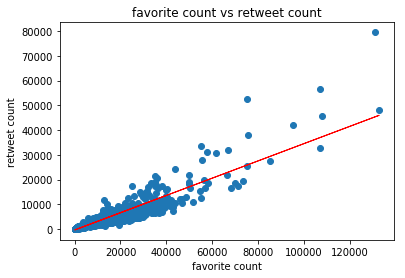

In [45]:
# Define x, y
x = df_tweets['favorite_count']
y = df_tweets['retweet_count']

# Create the scatter plot
plt.scatter(x, y)

# Calculate the linear regression
slope, intercept = np.polyfit(x, y, 1)
trend_line = slope * x + intercept

# Add the trend line to the scatter plot
plt.plot(x, trend_line, color='red', linewidth=1)

# Add labels and title
plt.xlabel('favorite count')
plt.ylabel('retweet count')
plt.title('favorite count vs retweet count')

# Save the plot as a PNG file
plt.savefig('figures/scatter_favorite_retweet.png')

# Show the plot
plt.show()

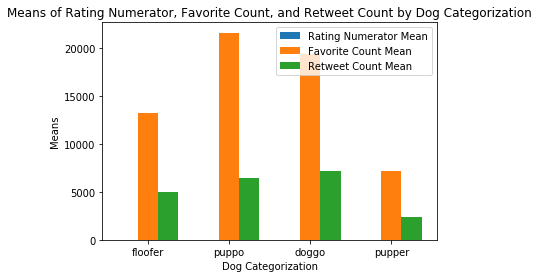

In [46]:
# Prepare the data
dog_categorization = df_group_cat['dog_categorization']
rating_mean = df_group_cat[('rating_numerator', 'mean')]
favorite_mean = df_group_cat[('favorite_count', 'mean')]
retweet_mean = df_group_cat[('retweet_count', 'mean')]

# Set the bar width
bar_width = 0.25

# Set the positions of the bars
r1 = np.arange(len(dog_categorization))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create the bar chart
plt.bar(r1, rating_mean, width=bar_width, label='Rating Numerator Mean')
plt.bar(r2, favorite_mean, width=bar_width, label='Favorite Count Mean')
plt.bar(r3, retweet_mean, width=bar_width, label='Retweet Count Mean')

# Add labels and title
plt.xlabel('Dog Categorization')
plt.ylabel('Means')
plt.title('Means of Rating Numerator, Favorite Count, and Retweet Count by Dog Categorization')

# Set the x-axis labels
plt.xticks([r + bar_width for r in range(len(dog_categorization))], dog_categorization)

# Add legend
plt.legend()

# Save the plot as a PNG file
plt.savefig('figures/bar_chart_means_by_dog_categorization.png')

# Show the plot
plt.show()

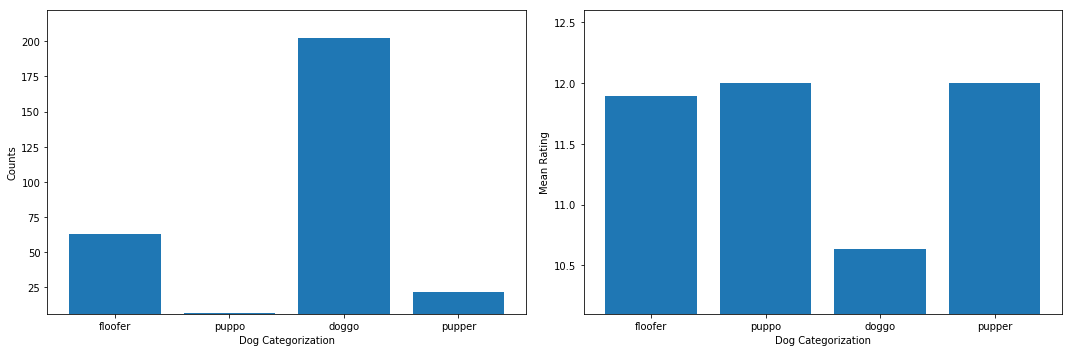

In [47]:
# Prepare the data
dog_categorization = df_group_cat['dog_categorization']
counts = df_group_cat[('rating_numerator', 'count')]
means = df_group_cat[('rating_numerator', 'mean')]

# Define the y-axis limits
count_ylim = (min(counts) * 0.9, max(counts) * 1.1)
mean_ylim = (min(means) * 0.95, max(means) * 1.05)

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Create the bar chart for counts on the first subplot
ax1.bar(dog_categorization, counts)
ax1.set_xlabel('Dog Categorization')
ax1.set_ylabel('Counts')
ax1.set_xticklabels(dog_categorization, rotation=0)
ax1.set_ylim(count_ylim)

# Create the bar chart for means on the second subplot
ax2.bar(dog_categorization, means)
ax2.set_xlabel('Dog Categorization')
ax2.set_ylabel('Mean Rating')
ax2.set_xticklabels(dog_categorization, rotation=0)
ax2.set_ylim(mean_ylim)

# Adjust the layout and save the plot as a PNG file
plt.tight_layout()
plt.savefig('figures/dog_cat_stats.png')

# Show the plot
plt.show()

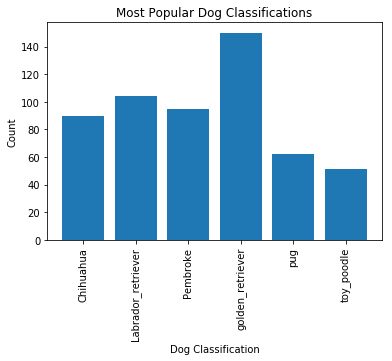

In [48]:

# Filter the DataFrame based on the condition
filtered_df_group_class = df_group_class[df_group_class[('rating_numerator', 'count')] > 50]

# Prepare the data
dog_classification = filtered_df_group_class['dog_classification']
count = filtered_df_group_class[('rating_numerator', 'count')]

# Create the bar chart
plt.bar(dog_classification, count)

# Add labels and title
plt.xlabel('Dog Classification')
plt.ylabel('Count')
plt.title('Most Popular Dog Classifications')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Save the plot as a PNG file
plt.savefig('figures/bar_chart_most_popular_dog_classifications_sorted.png')

# Show the plot
plt.show()
